# Lending Club Case Study

-----------------------------------------------
> Author : Shiva Kumar Bandaru   
E-mail : shivamkr.b271999@gmail.com  

------------------------------------------------------------------






- When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

- The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Dataset 'loan.csv' file using pandas

df = pd.read_csv('loan.csv',low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Dataset Overview

In [3]:
# check the shape and structure of the dataset

print("Rows and Columns       : ", df.shape)
print("Cardinality of dataset : ", df.ndim)

Rows and Columns       :  (39717, 111)
Cardinality of dataset :  2


## EDA: Exploratory Data Analysis


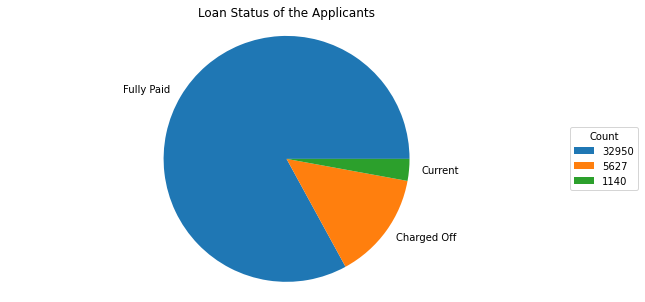

In [4]:
# Spread of appliacnts based on loan_status

plt.figure(figsize = (10, 5))
plt.pie(df.loan_status.value_counts(),labels = df.loan_status.value_counts().index)

plt.title('Loan Status of the Applicants')
plt.axis('equal')
plt.legend(df.loan_status.value_counts(),title="Count",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### <a id='3.6'> Observation 1:</a>

                                                Distribution of loan_status of the applicants. 

| Status      |  Percent |
| ----------- | -------- |
| Fully_Paid  |  82.9%   |
| Charged_Off |   4.1%   |
| Current     |   2.9%   |

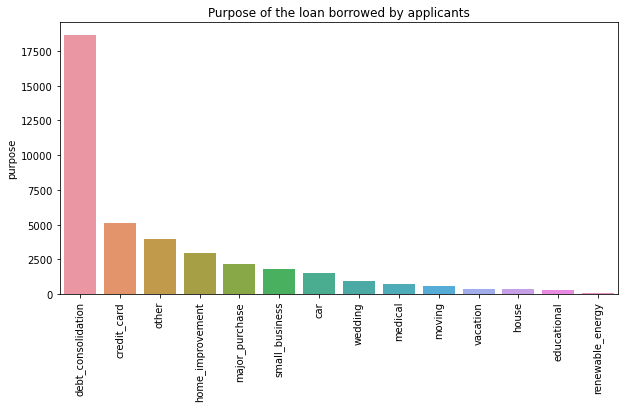

In [5]:

plt.figure(figsize = (10, 5))
sns.barplot(y = df['purpose'].value_counts(), x=df['purpose'].value_counts().index)
plt.title('Purpose of the loan borrowed by applicants')
plt.xticks(rotation =90)
plt.show()

### <a id='3.6'> Observation 2:</a>

                                                Purpose for the Loan Borrowed. 

| Purpose               | Percentage |
| --------------------- | ---------- |
| debt_consolidation    | `#46.9%`   |
| credit_card           | `#12.9%`   |
| other                 | `#10.0%`   |
| home_improvement      | `#7.4%`    |
| major_purchase        | `#5.5%`    |
| small_business        | `#4.6%`    |
| car                   | `#3.9%`    |
| wedding               | `#2.3%`    |
| medical               | `#1.7%`    |
| moving                | `#1.4%`    |
| vacation              | `#0.9%`    |
| house                 | `#0.9%`    |
| educational           | `#0.8%`    |
| renewable_energy      | `#0.2%`    |

### Data Cleaning

In [6]:
#Remove all th columns containing complete Null Values

df.dropna(axis=1, how='all', inplace=True)

In [7]:
# Further Removing the unnecessary columns
# Removing Customer Behaviour Columns 

list_unused_col = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url","desc", "title", "zip_code", "delinq_2yrs", "mths_since_last_delinq","out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp","last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d","collections_12_mths_ex_med", "policy_code", "acc_now_delinq","earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "mths_since_last_record", "revol_bal", "initial_list_status", "out_prncp","total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee","chargeoff_within_12_mths", "delinq_amnt", "tax_liens", "application_type","pub_rec_bankruptcies", "addr_state", "funded_amnt_inv", "installment", "revol_util", "total_acc"]

df.drop(list_unused_col, axis=1, inplace=True)

### What each column represents

1. loan_amnt                - The amount of money is Brrowed.
2. term                     - Loan Period
3. int_rate                 - Rate of Interest on the loan
4. grade                    - Grade which determines the behaviour of the Brrower according to his previous loans
5. sub_grade                - Sub-category for grade
6. emp_length               - Employement of the Borrower in years
7. home_ownership           - Brrower home owenship status
8. annaual_inc              - Income of the Borrower per year
9. verification_status      - Status of Brrower if is he verified.
10. issue_d                 - Date of Loan is issued
11. loan_status             - Categories represent if applicant is Fully_paid, Current, Charged_Off on Loan.
12. purpose                 - Reason for the Brrower to take the Loan.
13. dti                     - Debt-to_income Ratio determins persons ability to pay loan



### Treatment of missing values by removing/imputing:

As emp_length is catgorical variable we can impute the missing values by Mode which is 10+ years \
But it is highly dependent variable so we will not impute.

In [8]:
# There are 2.7% of values are missing in column emp_length
# Employement is the key feature to repay the loan
# as of now we are droppint hem for analysis

# Delete rows with null value
df.dropna(axis=0, subset=["emp_length"], inplace=True)

We can Impute the values with Mode (10+ Years) is the most occuring this might not affect the analysis

### Standardization of the columns

Converting the datatype of columns to ease the analysis
- int_rate
- term
- issue_d

In [9]:
# Removing '%' from 'int_rate' and converting the datatype as float
df['int_rate'] = df['int_rate'].apply(lambda x : x.replace('%',''))
df['int_rate'] = df['int_rate'].astype('float64')

# Removing 'month' from 'term' and converting the datatype as integer
df['term'] = df['term'].apply(lambda x : str(x).replace('months',''))
df['term'] = df['term'].astype('int64')

In [10]:
# Issue_d which is months when loan issued to borrowers is quite imporper
# converting issue_d to proper datetime format

def date_func(date):
    year = date.split("-")[0]
    if(len(year) == 1):
        date = "0"+date
    return date

from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x:date_func(x))
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# extracting month  from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)

**Remove the Current Loan applicants we need to analyse the data for only the Fully Paid and Charged off applicants** \
**To subject the risk:**

In [11]:
# remove the rows with loan_status as "Current"
df = df[df['loan_status'] != 'Current']

In [12]:
# We can Categorize Deafulters and Non-Defaulters
# Updating the column 'loan_status' as :

# 0 is for -->  NON-DEFAULTERS  --> 'Fully_Paid'
# 1 is for -->  DEFAULTERS      --> 'Charged_Off'

df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == "Fully Paid" else 1)

### Univaraite Analysis

#### Outlier Treatment in annual_inc

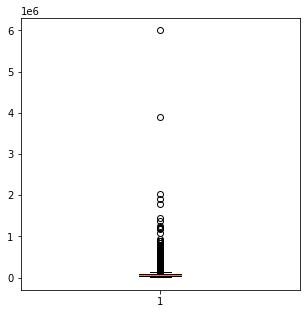

In [13]:
plt.figure(figsize = (5, 5))
plt.boxplot(df['annual_inc'])
plt.show()

In [14]:
# for column annual_inc, 
# the highest value is 6000000 where 75% quantile value is 83000, and is 100 times to its mean value
# we need to remomve outliers from annual_inc i.e. 99 to 100%

annual_inc_q = df["annual_inc"].quantile(0.99)
df = df[df["annual_inc"] < annual_inc_q]

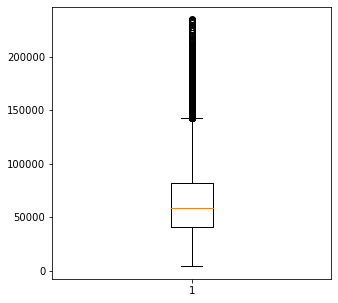

In [15]:
plt.figure(figsize = (5, 5))
plt.boxplot(df['annual_inc'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


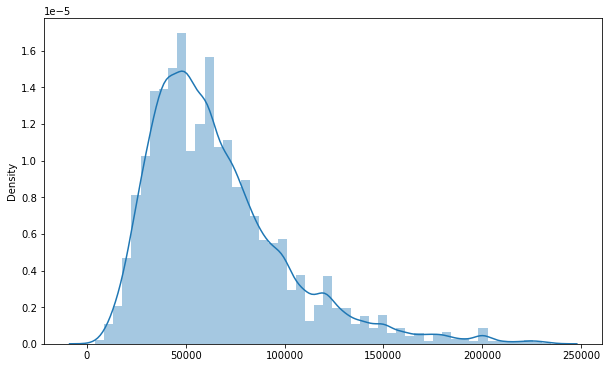

In [16]:
plt.figure(figsize = (10, 6))
sns.distplot(x= df['annual_inc'])
plt.show()

<Figure size 720x360 with 0 Axes>

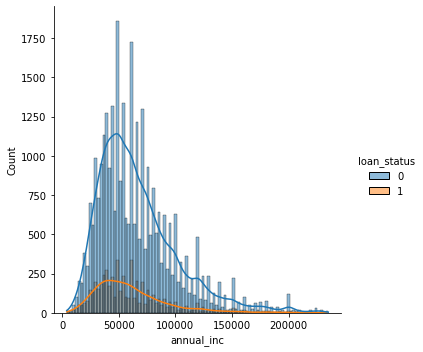

In [17]:
plt.figure(figsize = (10, 5))
sns.displot(x= df['annual_inc'], hue = df.loan_status, kde=True, color ='rb')
plt.show()

<Figure size 720x360 with 0 Axes>

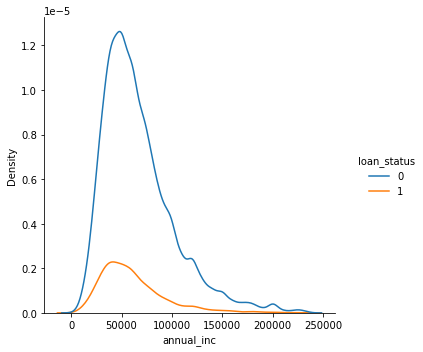

In [18]:
plt.figure(figsize = (10, 5))
sns.displot( x=df['annual_inc'], hue=df.loan_status , kind="kde")
plt.show()

### <a id='3.6'> Observation 3:</a>

Distribution of Defaulter and Non_Defaulters based on their Annual Income

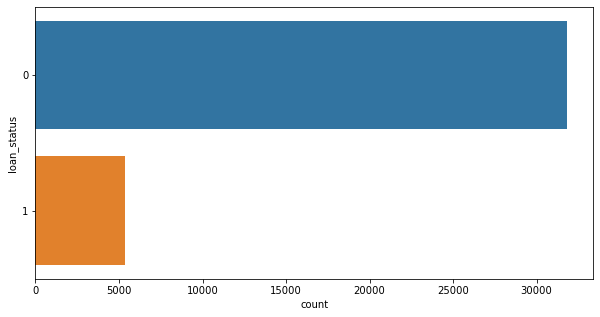

In [19]:
# check for amount of defaulters in the data using countplot

plt.figure(figsize=(10,5))
sns.countplot(y=df["loan_status"])
plt.show()

In [20]:
df["loan_status"].value_counts()

0    31808
1     5357
Name: loan_status, dtype: int64

### <a id='3.6'> Observation 4:</a>

Count of Number of Deafulters(1) and Non-Defaulters(0) 

0 - 31808 <br>
1 - 5357



<AxesSubplot:xlabel='verification_status', ylabel='count'>

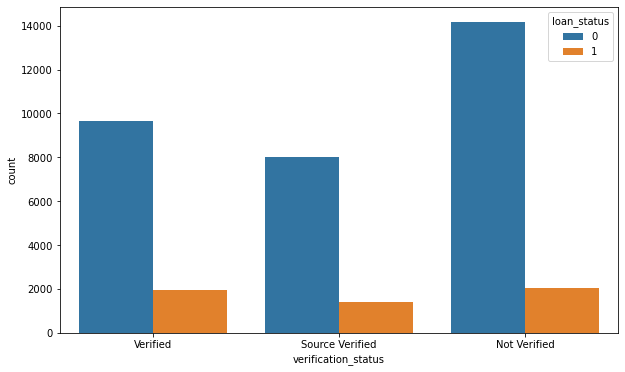

In [21]:
plt.figure(figsize = (10, 6))
sns.countplot(x=df.verification_status, hue = df.loan_status)

### <a id='3.6'> Observation 5:</a>

Count Plot of `#verification_status` based upon the `#loan_status`

__For All the Bar Graphs below we used  y-axis as the `#loan_status` and plotting it with other features__ <br>
__This will give as an insight that an applicant `#Chance for Default`__  <br>
__`#Chance for Default` is varies over 0-1 which gives us the precentage of an applicant to become an Defaulter__

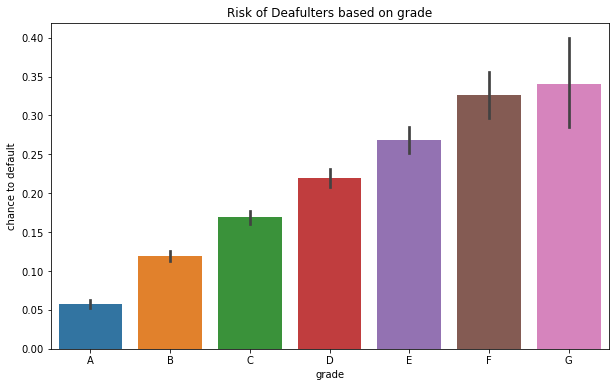

In [22]:
sort_grades = df['grade'].sort_values(ascending = True)

plt.figure(figsize = (10, 6))
sns.barplot(x=sort_grades, y=df['loan_status'])
plt.title("Risk of Deafulters based on grade")
plt.xlabel("grade")
plt.ylabel("chance to default")
plt.show()

### <a id='3.6'> Observation 6:</a>

In the above plot we can see that higher the grade is higher chance for Defaulters <br>

### <a id='3.6'> Recommendation  :</a>

- Investment in Applicants with grade A, B, C, D will repay the loan back(Lower Risk)
- Investment in Applicants with grade E, F, G will repay the loan back but(Higer Risk)

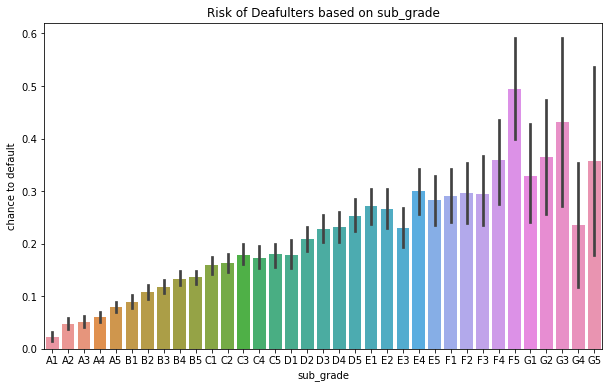

In [23]:
sort_sub_grades = df['sub_grade'].sort_values(ascending = True)

plt.figure(figsize = (10, 6))
sns.barplot(x=sort_sub_grades, y=df['loan_status'])
plt.title("Risk of Deafulters based on sub_grade")
plt.xlabel("sub_grade")
plt.ylabel("chance to default")
plt.show()

### <a id='3.6'> Observation 7:</a>

In the above plot we can see that higher the grade is higher chance for Defaulters <br>

### <a id='3.6'> Recommendation  :</a>

- Investment in Applicants with grade A, B, C, D will repay the loan back(Lower Risk)
- Investment in Applicants with grade E, F, G will repay the loan back but(Higer Risk)

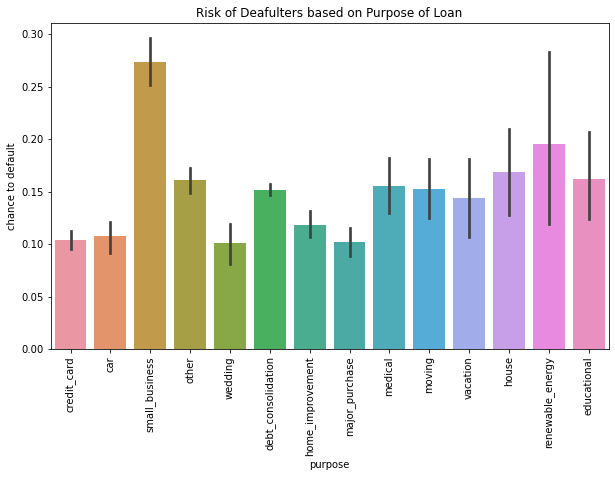

In [24]:
plt.figure(figsize = (10, 6))
sns.barplot(x=df['purpose'], y=df['loan_status'])
plt.title("Risk of Deafulters based on Purpose of Loan")
plt.xlabel("purpose")
plt.ylabel("chance to default")
plt.xticks(rotation =90)
plt.show()

### <a id='3.6'> Observation 8:</a>

The above plot (purpose Vs Chance for Default) shows the areas where will be risk of investing. <br>

### <a id='3.6'> Reccomendation :</a>

Investing in credit_card, car, wedding, debt_consolidation, home_imporovement, major_purchase, vacation and eduction has lower Defaulter ratio.

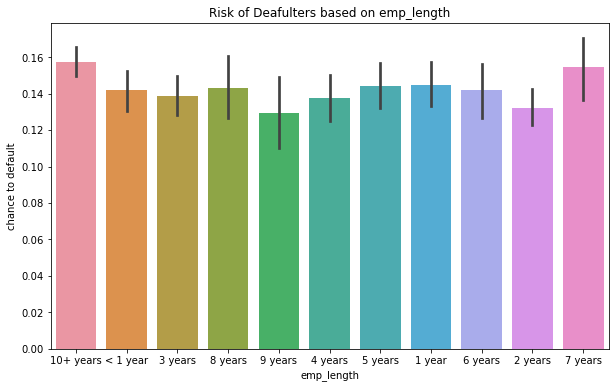

In [25]:
plt.figure(figsize = (10, 6))
sns.barplot(x=df['emp_length'], y=df['loan_status'])
plt.title("Risk of Deafulters based on emp_length")
plt.xlabel("emp_length")
plt.ylabel("chance to default")
plt.show()

### <a id='3.6'> Observation 9:</a>

The above plot between the (emp_length Vs Chance for Default) has no correlation.

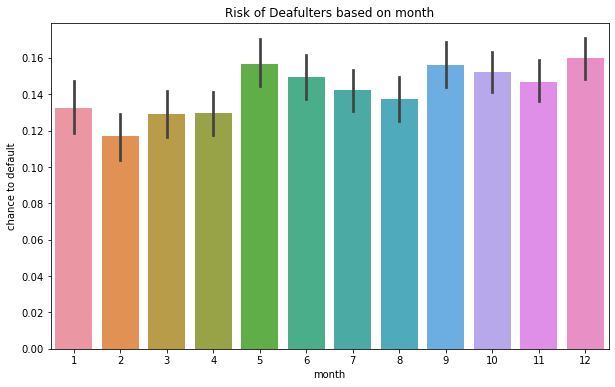

In [26]:
plt.figure(figsize = (10, 6))
sns.barplot(x=df['month'], y=df['loan_status'])
plt.title("Risk of Deafulters based on month")
plt.xlabel("month")
plt.ylabel("chance to default")
plt.show()

### <a id='3.6'> Observation 10:</a>

The above plot between the (month Vs Chance for Default) has no correlation.

### Binning of Continious Columns

- dti
- int_rate
- annual_inc
- loan_amnt

For the above continious features we have large scale of data variation so making the bins for them will ease our plots

In [27]:
# creating bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
chunks_lis = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
df['dti_range'] = pd.cut(df['dti'], bins, labels=chunks_lis)

# creating bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
chunks_lis = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
df['int_rate_range'] = pd.cut(df['int_rate'], bins, labels=chunks_lis)

# creating bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
chunks_lis = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels=chunks_lis)

# creating bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
chunks_lis = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins, labels=chunks_lis)

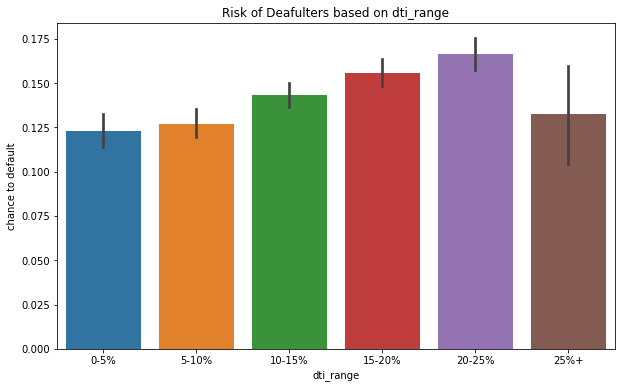

In [28]:
plt.figure(figsize = (10, 6))
sns.barplot(x=df['dti_range'], y=df['loan_status'])
plt.title("Risk of Deafulters based on dti_range")
plt.xlabel("dti_range")
plt.ylabel("chance to default")
plt.show()

### <a id='3.6'> Observation 11:</a>

The above plot between the (dti_rage Vs Chance to Default). <br>
Chance of deafult is increasing w.r.t the dti_range but after the 25% Chance of deafult has become low.

### <a id='3.6'> Reccomendation :</a>
Invest on applicants who has dti between 0-15% and on 25%

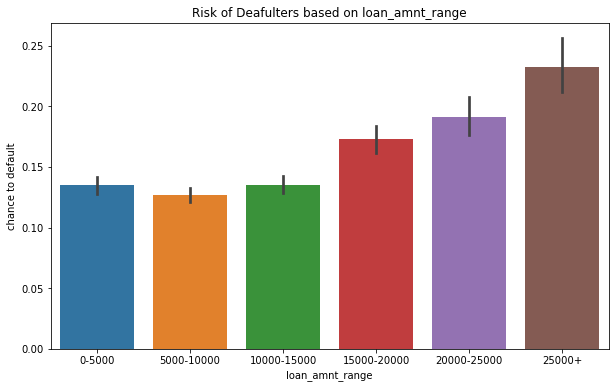

In [29]:
plt.figure(figsize = (10, 6))
sns.barplot(x=df['loan_amnt_range'], y=df['loan_status'])
plt.title("Risk of Deafulters based on loan_amnt_range")
plt.xlabel("loan_amnt_range")
plt.ylabel("chance to default")
plt.show()

### <a id='3.6'> Observation 12:</a>

The above plot (loan_amnt_range Vs Chance to Default) has positive correlation

### <a id='3.6'> Reccomendation :</a>

Invest on applicants with loan_amnt between 0-25000 will have lower risk.

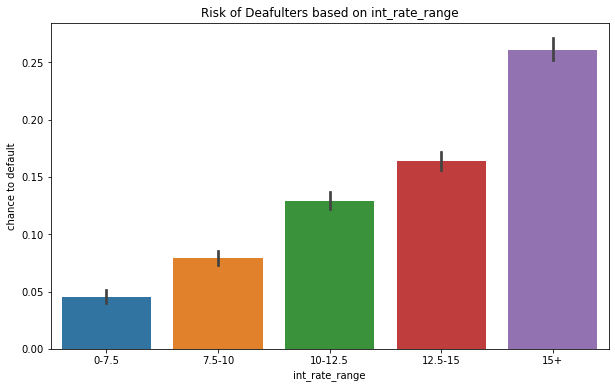

In [30]:
plt.figure(figsize = (10, 6))
sns.barplot(x=df['int_rate_range'], y=df['loan_status'])
plt.title("Risk of Deafulters based on int_rate_range")
plt.xlabel("int_rate_range")
plt.ylabel("chance to default")
plt.show()

### <a id='3.6'> Observation 13:</a>

The above plot (int_range Vs Chance to Default)shows the Higher the interset rate, higher the chance of default.

### <a id='3.6'> Reccomendation :</a>

Invest on loans with interest rate between 0-15% will has lower risk.

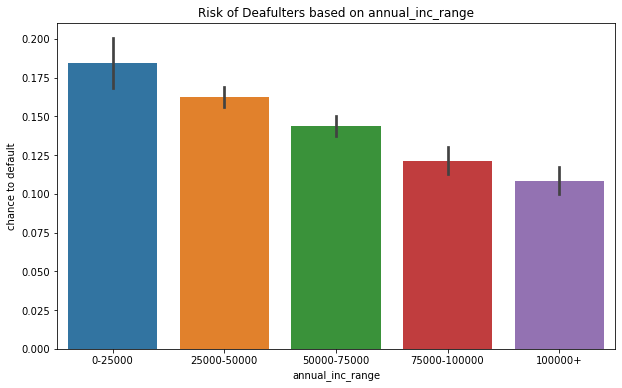

In [31]:
plt.figure(figsize = (10, 6))
sns.barplot(x=df['annual_inc_range'], y=df['loan_status'])
plt.title("Risk of Deafulters based on annual_inc_range")
plt.xlabel("annual_inc_range")
plt.ylabel("chance to default")
plt.show()

### <a id='3.6'> Observation 14:</a>

The above plot (annual_inc_range Vs Chance to Default)shows the Lower the Income of applicant, higher the chance of default.

### <a id='3.6'> Reccomendation :</a>

Invest on applicants whose annual income is grater than 50000 has lower risk.

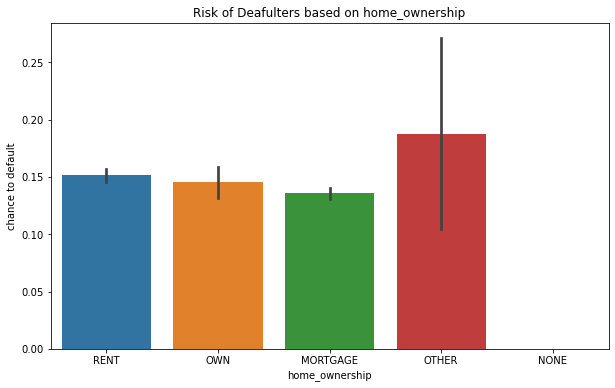

In [32]:
plt.figure(figsize = (10, 6))
sns.barplot(x=df['home_ownership'], y=df['loan_status'])
plt.title("Risk of Deafulters based on home_ownership")
plt.xlabel("home_ownership")
plt.ylabel("chance to default")
plt.show()

### <a id='3.6'> Observation 15:</a>

The above plot (home_ownership Vs Chance to Default) shows no relation.

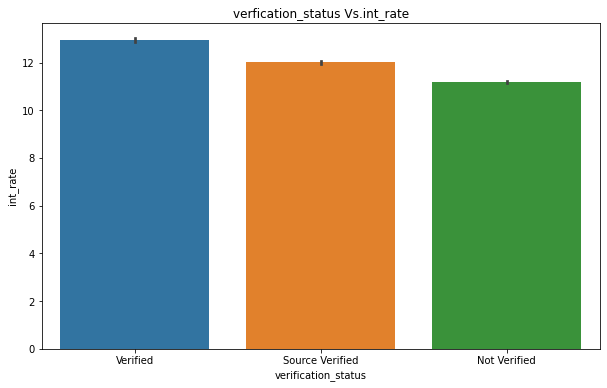

In [33]:
plt.figure(figsize = (10, 6))
sns.barplot(x=df.verification_status, y= df.int_rate)
plt.title("verfication_status Vs.int_rate")
plt.show()

### <a id='3.6'> Observation 16:</a>

The above plot (verification_status Vs int_rate) shows no relation.

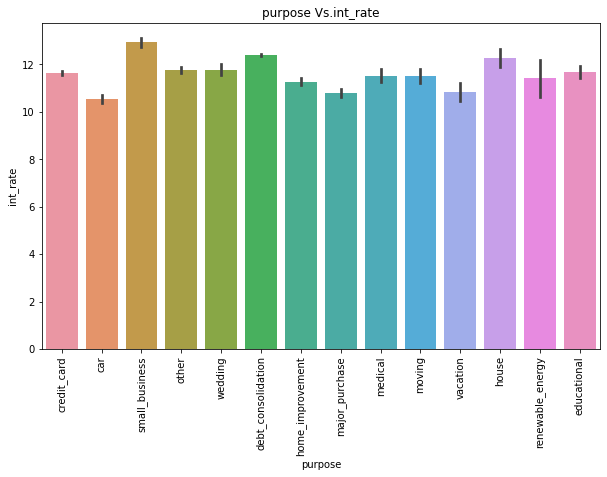

In [34]:
plt.figure(figsize = (10, 6))
sns.barplot(x=df.purpose, y= df.int_rate)
plt.title("purpose Vs.int_rate")
plt.xlabel("purpose")
plt.ylabel("int_rate")
plt.xticks(rotation =90)
plt.show()

### <a id='3.6'> Observation 17:</a>

The above plot (purpose Vs int_rate) shows no relation.

## Bivariate Analysis

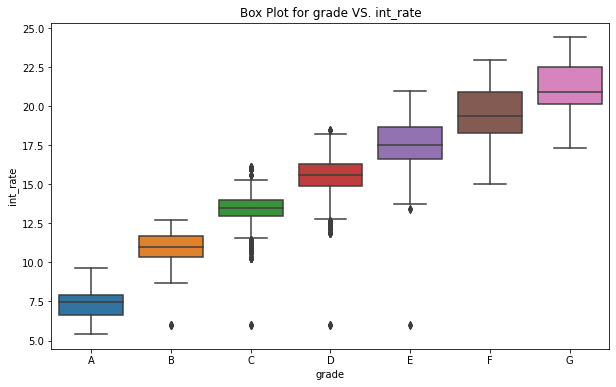

In [35]:
plt.figure(figsize = (10, 6))
sns.boxplot(x='grade',y='int_rate', data=df, order = "ABCDEFG")
plt.title("Box Plot for grade VS. int_rate")
plt.show()

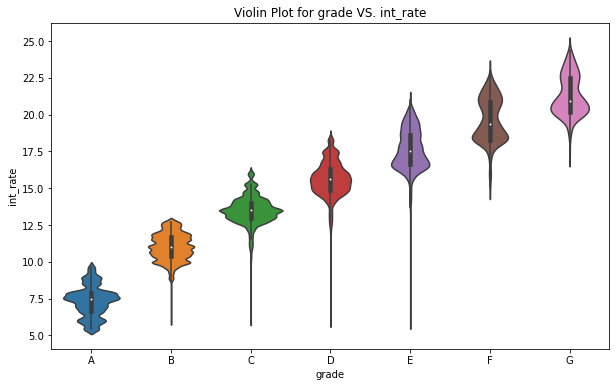

In [36]:
# 'int_rate' vs 'grade' Plot

plt.figure(figsize = (10, 6))
sns.violinplot(x='grade',y='int_rate', data=df, order = "ABCDEFG", split =True)
plt.title("Violin Plot for grade VS. int_rate")
plt.show()

### <a id='3.6'> Observation 18:</a>

The above Box plot (grade Vs int_rate). <br>
The above Violin plot (grade Vs int_rate).
Shows the Relation between the grade Vs int_rate  <br>

Applicants with Grades(A, B, C, D) has lower interest and are capable for repaying the loan
where as the applicants with grade(E, F, G) has higher interest rate

### <a id='3.6'> Reccomendation :</a>
Invest on Applicants with good grade(A, B, C) are more likely to payback the loan.

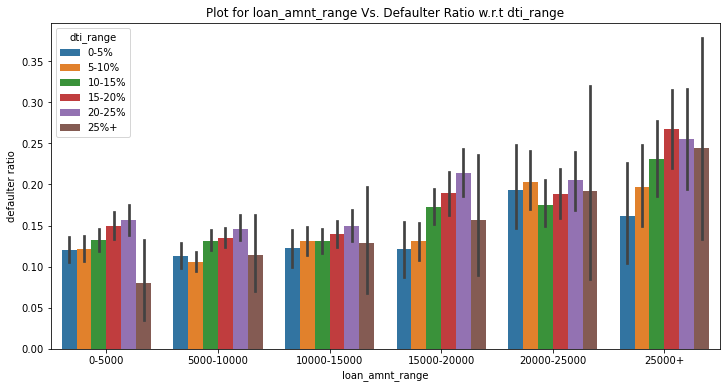

In [37]:
plt.figure(figsize = (12,6))
sns.barplot(x=df['loan_amnt_range'], y=df['loan_status'], hue=df['dti_range'])
plt.title("Plot for loan_amnt_range Vs. Defaulter Ratio w.r.t dti_range")
plt.ylabel("defaulter ratio")
plt.show()

### <a id='3.6'> Observation 19:</a>

The above plot (loan_amnt_range Vs int_rate) with respect to dti, shows that dti of the applicants with various annual income ranges.

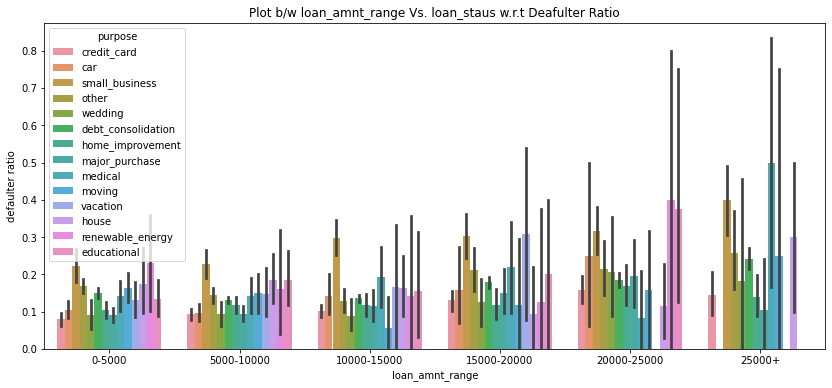

In [38]:
plt.figure(figsize = (14, 6))
sns.barplot(x=df['loan_amnt_range'], y=df['loan_status'], hue=df['purpose'])
plt.title("Plot b/w loan_amnt_range Vs. loan_staus w.r.t Deafulter Ratio")
plt.ylabel("defaulter ratio")
plt.show()

### <a id='3.6'> Observation 20:</a>

The above plot (loan_amnt_range Vs defaulter ratio) with respect to purpose, shows the purpose of the loans of the applicants with various annual income ranges.

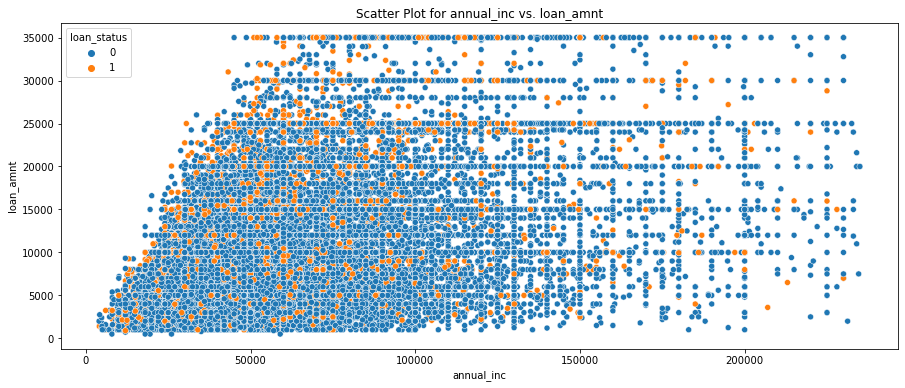

In [39]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="annual_inc", y="loan_amnt", hue="loan_status", data=df)
plt.title("Scatter Plot for annual_inc vs. loan_amnt")
plt.show()

### <a id='3.6'> Observation 21:</a>

The above scatter plot (annual_inc Vs loan_amnt) with respect to loan_status, shows some positive correlation

## Multivariate Analysis

In [40]:
df.corr()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,month
loan_amnt,1.000000,0.347544,0.296274,0.411741,0.064734,0.071124,0.053353
term,0.347544,1.000000,0.439503,0.072769,0.176037,0.079542,0.034159
int_rate,0.296274,0.439503,1.000000,0.062536,0.214441,0.114697,0.026832
annual_inc,0.411741,0.072769,0.062536,1.000000,-0.060743,-0.111776,0.015278
loan_status,0.064734,0.176037,0.214441,-0.060743,1.000000,0.041895,0.026145
dti,0.071124,0.079542,0.114697,-0.111776,0.041895,1.000000,0.013079
month,0.053353,0.034159,0.026832,0.015278,0.026145,0.013079,1.000000


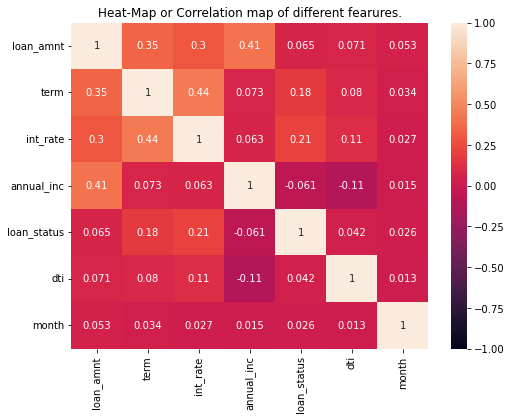

In [41]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(),vmin=-1.0,vmax=1.0,annot=True)
plt.title("Heat-Map or Correlation map of different fearures.")
plt.show()

### <a id='3.6'> Observation 22:</a>

The above Heatmap shows th correlation between th features 	<br>
loan_amnt, term, int_rate, annual_inc, loan_status, dti, month 

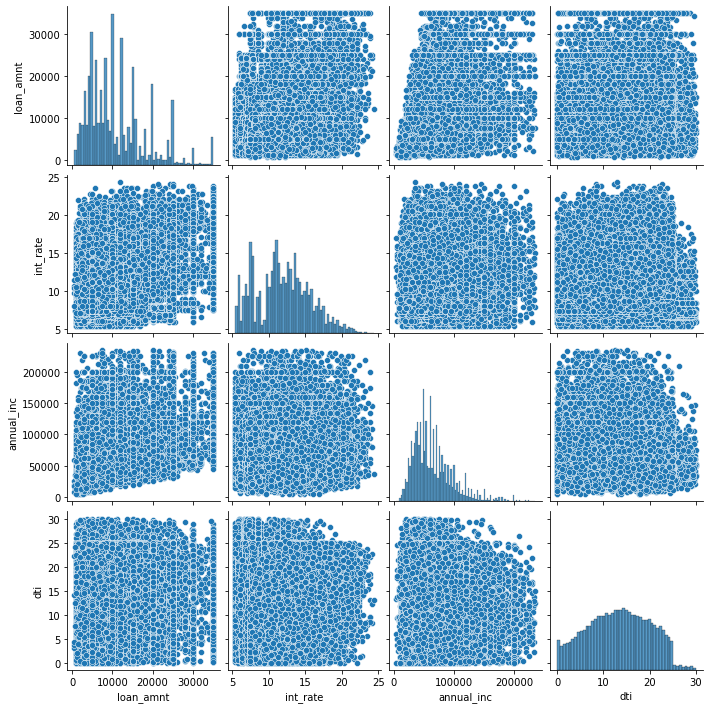

In [42]:
sns.pairplot(df,
             x_vars = ['loan_amnt','int_rate','annual_inc','dti'],
             y_vars = ['loan_amnt','int_rate','annual_inc','dti']
            )
plt.show()

### <a id='3.6'> Observation 23:</a>

The above Pair-Plot shows th correlation between th features 	<br>
loan_amnt, int_rate, annual_inc, dti